In [97]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 22 07:05:30 2017

@author: angusurquhart
Extract meta data from trackobot
"""
from collections import defaultdict
import trackopy
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [75]:
#Setup trackobot
user = {"password":'e479deb2e1', 'username':'still-gnoll-6604'}
trackobot = trackopy.Trackobot(user['username'], user['password'])

In [76]:
#trackobot.history(page=7)

In [77]:
#Put all the pages into a single dictionary
#Note that this is game level data - 'history'
singledict = {}
list_of_game_dicts = []

for x in range(1,8):

     singledict[1] = trackobot.history(page=x)
     list_of_game_dicts.append(singledict.copy())
    
list_of_game_dicts

[{1: {'history': [{'added': '2017-05-20T19:06:34.000Z',
     'card_history': [{'card': {'id': 'GAME_005',
        'mana': 0,
        'name': 'The Coin'},
       'player': 'opponent',
       'turn': 1},
      {'card': {'id': 'CS2_013', 'mana': 2, 'name': 'Wild Growth'},
       'player': 'opponent',
       'turn': 1},
      {'card': {'id': 'UNG_078', 'mana': 2, 'name': 'Tortollan Forager'},
       'player': 'me',
       'turn': 2},
      {'card': {'id': 'UNG_928', 'mana': 3, 'name': 'Tar Creeper'},
       'player': 'opponent',
       'turn': 2},
      {'card': {'id': 'UNG_078', 'mana': 2, 'name': 'Tortollan Forager'},
       'player': 'me',
       'turn': 3},
      {'card': {'id': 'EX1_096', 'mana': 2, 'name': 'Loot Hoarder'},
       'player': 'opponent',
       'turn': 3},
      {'card': {'id': 'CS2_017', 'mana': 2, 'name': 'Shapeshift'},
       'player': 'opponent',
       'turn': 3},
      {'card': {'id': 'EX1_154', 'mana': 2, 'name': 'Wrath'},
       'player': 'me',
       'turn': 4}

In [78]:
#this shows that i can access a single page
#I'll come back to this and loop over it once I have my output ready
page = list_of_game_dicts[0]
page

{1: {'history': [{'added': '2017-05-20T19:06:34.000Z',
    'card_history': [{'card': {'id': 'GAME_005',
       'mana': 0,
       'name': 'The Coin'},
      'player': 'opponent',
      'turn': 1},
     {'card': {'id': 'CS2_013', 'mana': 2, 'name': 'Wild Growth'},
      'player': 'opponent',
      'turn': 1},
     {'card': {'id': 'UNG_078', 'mana': 2, 'name': 'Tortollan Forager'},
      'player': 'me',
      'turn': 2},
     {'card': {'id': 'UNG_928', 'mana': 3, 'name': 'Tar Creeper'},
      'player': 'opponent',
      'turn': 2},
     {'card': {'id': 'UNG_078', 'mana': 2, 'name': 'Tortollan Forager'},
      'player': 'me',
      'turn': 3},
     {'card': {'id': 'EX1_096', 'mana': 2, 'name': 'Loot Hoarder'},
      'player': 'opponent',
      'turn': 3},
     {'card': {'id': 'CS2_017', 'mana': 2, 'name': 'Shapeshift'},
      'player': 'opponent',
      'turn': 3},
     {'card': {'id': 'EX1_154', 'mana': 2, 'name': 'Wrath'},
      'player': 'me',
      'turn': 4},
     {'card': {'id': 'EX1

In [79]:
#this shows the level at which useful data is containted
#the meta stuff in this case is pretty useless - the real info is in the history.
page[1].keys()

dict_keys(['meta', 'history'])

In [80]:
#This is actually the data we'll want to flatten into a table
page[1]['history']

[{'added': '2017-05-20T19:06:34.000Z',
  'card_history': [{'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
    'player': 'opponent',
    'turn': 1},
   {'card': {'id': 'CS2_013', 'mana': 2, 'name': 'Wild Growth'},
    'player': 'opponent',
    'turn': 1},
   {'card': {'id': 'UNG_078', 'mana': 2, 'name': 'Tortollan Forager'},
    'player': 'me',
    'turn': 2},
   {'card': {'id': 'UNG_928', 'mana': 3, 'name': 'Tar Creeper'},
    'player': 'opponent',
    'turn': 2},
   {'card': {'id': 'UNG_078', 'mana': 2, 'name': 'Tortollan Forager'},
    'player': 'me',
    'turn': 3},
   {'card': {'id': 'EX1_096', 'mana': 2, 'name': 'Loot Hoarder'},
    'player': 'opponent',
    'turn': 3},
   {'card': {'id': 'CS2_017', 'mana': 2, 'name': 'Shapeshift'},
    'player': 'opponent',
    'turn': 3},
   {'card': {'id': 'EX1_154', 'mana': 2, 'name': 'Wrath'},
    'player': 'me',
    'turn': 4},
   {'card': {'id': 'EX1_154', 'mana': 2, 'name': 'Wrath'},
    'player': 'me',
    'turn': 4},
   {'car

In [81]:
#This is the meta data for a single game
page[1]['history'][0]

{'added': '2017-05-20T19:06:34.000Z',
 'card_history': [{'card': {'id': 'GAME_005', 'mana': 0, 'name': 'The Coin'},
   'player': 'opponent',
   'turn': 1},
  {'card': {'id': 'CS2_013', 'mana': 2, 'name': 'Wild Growth'},
   'player': 'opponent',
   'turn': 1},
  {'card': {'id': 'UNG_078', 'mana': 2, 'name': 'Tortollan Forager'},
   'player': 'me',
   'turn': 2},
  {'card': {'id': 'UNG_928', 'mana': 3, 'name': 'Tar Creeper'},
   'player': 'opponent',
   'turn': 2},
  {'card': {'id': 'UNG_078', 'mana': 2, 'name': 'Tortollan Forager'},
   'player': 'me',
   'turn': 3},
  {'card': {'id': 'EX1_096', 'mana': 2, 'name': 'Loot Hoarder'},
   'player': 'opponent',
   'turn': 3},
  {'card': {'id': 'CS2_017', 'mana': 2, 'name': 'Shapeshift'},
   'player': 'opponent',
   'turn': 3},
  {'card': {'id': 'EX1_154', 'mana': 2, 'name': 'Wrath'},
   'player': 'me',
   'turn': 4},
  {'card': {'id': 'EX1_154', 'mana': 2, 'name': 'Wrath'},
   'player': 'me',
   'turn': 4},
  {'card': {'id': 'UNG_072', 'mana':

In [82]:
#This is the id for a single game
page[1]['history'][0]['id']

77968729

In [83]:
#Build a dataframe of page 1 meta info
df = pd.DataFrame(page[1]['history'], columns=['added','coin', 'duration','hero','hero_deck','id','legend','mode','note','opponent','opponent_deck','rank','result'])
df

,added,coin,duration,hero,hero_deck,id,legend,mode,note,opponent,opponent_deck,rank,result
0,2017-05-20T19:06:34.000Z,False,746,Druid,Jade,77968729,NaN,casual,None,Druid,None,NaN,loss
1,2017-05-20T18:53:37.000Z,True,627,Druid,Jade,77967267,NaN,casual,None,Warrior,None,NaN,win
2,2017-05-20T18:42:22.000Z,True,468,Priest,Miracle,77965955,NaN,casual,None,Priest,None,NaN,loss
3,2017-05-20T18:34:15.000Z,False,183,Priest,Miracle,77964997,NaN,casual,None,Warrior,None,NaN,win
4,2017-05-20T18:31:05.000Z,False,356,Priest,None,77964656,NaN,casual,None,Druid,None,NaN,loss
5,2017-05-20T09:04:49.000Z,True,770,Paladin,Murloc,77898655,NaN,ranked,None,Warrior,Taunt,NaN,loss
6,2017-03-20T07:54:57.000Z,True,777,Paladin,None,67984619,NaN,casual,None,Shaman,None,NaN,win
7,2017-03-20T07:41:49.000Z,False,59,Paladin,None,67983922,NaN,casual,None,Hunter,None,NaN,win
8,2017-03-19T20:26:52.000Z,False,651,Shaman,Jade,67935063,NaN,ranked,None,Druid,None,NaN,win
9,2017-03-19T10:59:14.000Z,False,749,Druid,None,67863615,NaN,ranked,None,Druid,None,NaN,win


In [84]:
#Create an empty dataframe for all the meta game fields
columns = ['added','coin', 'duration','hero','hero_deck','id','legend','mode','note','opponent','opponent_deck','rank','result']
metatable = pd.DataFrame(columns=columns)
metatable
metatable.shape

(0, 13)

In [85]:
#This will now loop through and create my meta table
for i in range(len(list_of_game_dicts)):
    metatable = metatable.append(pd.DataFrame(list_of_game_dicts[i][1]['history'], columns=['added','coin', 'duration','hero',
                                                                                        'hero_deck','id','legend','mode','note',
                                                                                        'opponent','opponent_deck','rank','result']
                                         ),ignore_index = True)

metatable.shape


(105, 13)

In [86]:
metatable

,added,coin,duration,hero,hero_deck,id,legend,mode,note,opponent,opponent_deck,rank,result
0,2017-05-20T19:06:34.000Z,False,746,Druid,Jade,77968729,NaN,casual,None,Druid,None,NaN,loss
1,2017-05-20T18:53:37.000Z,True,627,Druid,Jade,77967267,NaN,casual,None,Warrior,None,NaN,win
2,2017-05-20T18:42:22.000Z,True,468,Priest,Miracle,77965955,NaN,casual,None,Priest,None,NaN,loss
3,2017-05-20T18:34:15.000Z,False,183,Priest,Miracle,77964997,NaN,casual,None,Warrior,None,NaN,win
4,2017-05-20T18:31:05.000Z,False,356,Priest,None,77964656,NaN,casual,None,Druid,None,NaN,loss
5,2017-05-20T09:04:49.000Z,True,770,Paladin,Murloc,77898655,NaN,ranked,None,Warrior,Taunt,NaN,loss
6,2017-03-20T07:54:57.000Z,True,777,Paladin,None,67984619,NaN,casual,None,Shaman,None,NaN,win
7,2017-03-20T07:41:49.000Z,False,59,Paladin,None,67983922,NaN,casual,None,Hunter,None,NaN,win
8,2017-03-19T20:26:52.000Z,False,651,Shaman,Jade,67935063,NaN,ranked,None,Druid,None,NaN,win
9,2017-03-19T10:59:14.000Z,False,749,Druid,None,67863615,NaN,ranked,None,Druid,None,NaN,win


In [87]:
 #metatable.sort_values('added')

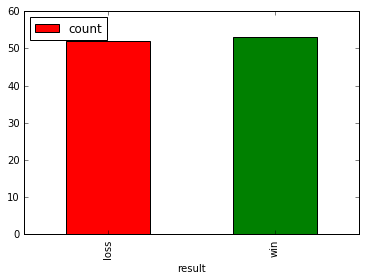

In [106]:
#Now i want to look at my wins vs. my losses
totalresults = metatable.groupby(['result'])['id'].agg(['count'])
colors = ['red','green']
totalresults.plot.bar(color = colors)

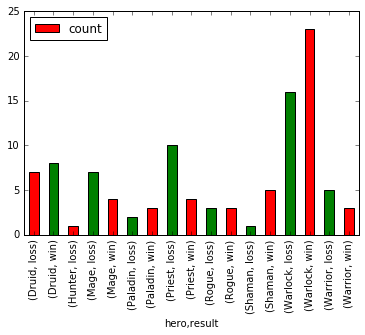

In [109]:
#Also which heros have i been using and what are my win losses:
wins_by_hero = metatable.groupby(['hero','result'])['id'].agg(['count'])
bar_width = 0.35
#wins_by_hero.plot.bar()
wins_by_hero.plot.bar(color = colors)